# COMP60711 - Part 2 Coursework 2 (CW4)

|                           |                                                                                                                                                                               |
|--------------------------:|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|              Course Unit: | COMP60711: Data Engineering                                                                                                                                                   |
| Responsible Staff Member: | Jiaoyan Chen                                                                                                                                                          |
|                    Marks: | This coursework is worth **25%** of the overall marks for this unit.                                                                                                                |
|              Submissions: | This is the **4th** of **4** assessed submissions.                                                                                                                                    |
|     Method of Submitting: | This notebook, after completion, should be saved as a HTML document and submitted using Blackboard                                                                                      |
|                 Deadline: | Monday 28th October 09AM (UK time)                                                                                                                                                                            |
|         Late Submissions: | Extensions will only be granted as a result of formally processed [Mitigating Circumstances](http://documents.manchester.ac.uk/DocuInfo.aspx?DocID=427). Marks for late submissions will be reduced in line with the [University policy](http://documents.manchester.ac.uk/display.aspx?DocID=24561). |

Please complete the questions in the spaces provided (under the "Answer" block for each question), then download the notebook in HTML format and submit to Blackboard.

Please also add your student ID and name below.

| Student ID (7-8 digit number) | Full Name |
|:-------------------------------:|:-----------:|
|       14160670                 |  Mohammad Wathiq Soualhi         |

## Reminders
* **Please make clear any assumptions and provide evidence to justify your answers** 
* Jupyter notebooks use markdown. A brief summary of how to use markdown can be seen [here](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet). Otherwise, please refer to the brief guide on Blackboard.
* You **must** cite any sources used, from web pages to academic papers and textbooks.
* Please ensure your code has no errors, and that the output is shown in your submitted version.
* We have added some general notebooks on Blackboard to cover the basics of plotting in Python, Jupyter notebooks, and anaconda.
* Some questions require a mixture of code and text to answer the question. Marks are awarded based on the output of your code (i.e. graphs) and the explanation provided, not on the code itself.

# Q1: Pre-processing & Feature Importance (9 marks)

This question will use the `"genes-leukemia.csv"` dataset available on Blackboard. For some background information about this dataset, see https://www.kdnuggets.com/data_mining_course/data/genes-leukemia-description.txt. The sub-questions will involve inspecting and pre-processing the data in order to use a decision tree. We will then look at which features are deemed important for prediction, and how removing important features affects tree structure.

It is expected that you will use `pandas` for this question, though this is not a requirement (but it may be more difficult if you do not).

## Q1.1 (1 mark)

Count the number of records/examples where the "Treatment_Response" feature is non-missing. Describe these examples in terms of the other features (Year from XXXX to YYYY, Gender = X etc.)

**Hint:**
* You need to ensure that you are looking at all of the data. By default, some of the columns may be truncated, in which case you should adjust this (through e.g. `pd.set_option("display.max_columns", 100)`)

## Q1.1 Answer

In [69]:
import pandas as pd

genes_leukemia = pd.read_csv('genes-leukemia.csv')
pd.set_option("display.max_columns", 100)

# Check for non-missing values in "Treatment_Response"
non_missing_treatment = genes_leukemia[genes_leukemia["Treatment_Response"] != "?"]

# Count the number of records where "Treatment_Response" is non-missing
print('Number of records with non-missing "Treatment_Response":', non_missing_treatment.shape[0])

# Display the dataframe without missing values in "Treatment_Response"
print('\nDataframe with non-missing "Treatment_Response":')
display(non_missing_treatment)

# Describe these records in terms of other features
print('\nDescriptive statistics for the above dataframe:')
display(non_missing_treatment.describe(include='all'))

Number of records with non-missing "Treatment_Response": 15

Dataframe with non-missing "Treatment_Response":


,SNUM,CLASS,BM_PB,TB_if_ALL,FAB_if_AML,Year,Gender,pct_Blasts,Treatment_Response,PS,Source,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175
27,s28,AML,BM,?,M2,?,?,79,Failure,0.44,CALGB,297,279,841,102,20,449,456,1929,2702,313,323,107,238,384,209,1641,20,32,822,64,20,20,28,596,75,214,2224,292,733,832,43,893,443,300,91,151,20,353,20,429
28,s29,AML,BM,?,M2,?,?,34,Failure,0.74,CALGB,190,277,500,237,20,65,259,1647,1736,243,125,150,217,179,29,2545,31,173,1137,35,20,20,178,309,20,514,3348,151,1296,294,50,624,225,237,58,66,20,279,35,314
29,s30,AML,BM,?,M5,?,?,93,Failure,0.80,CALGB,326,136,426,238,20,172,487,2112,3553,229,158,20,213,651,160,3818,21,118,1050,20,20,84,20,313,29,147,6218,173,647,148,20,388,251,100,20,20,60,250,20,208
30,s31,AML,BM,?,M4,?,?,77,Failure,0.61,CALGB,197,321,871,57,60,239,554,1555,3255,132,295,31,283,469,223,2943,52,20,1157,23,20,20,115,275,20,159,1548,119,1085,309,45,432,595,192,61,20,56,381,20,385
31,s32,AML,BM,?,M1,?,?,86,Failure,0.47,CALGB,259,283,671,628,34,683,462,1514,4249,230,368,210,264,328,293,2535,24,249,1083,59,20,127,136,311,165,165,3297,185,1467,259,68,706,863,339,50,192,88,671,20,688
32,s33,AML,BM,?,M2,?,?,70,Failure,0.89,CALGB,100,151,109,20,20,153,672,2693,1871,282,110,20,304,133,73,1373,29,380,1099,33,20,47,63,20,20,307,3482,172,1513,256,20,736,678,59,20,20,20,200,20,248
33,s34,AML,BM,?,M2,?,?,77,Success,0.64,CALGB,355,226,803,206,20,20,405,1811,3236,179,263,56,293,427,208,2402,20,20,652,35,20,121,181,279,34,110,2947,200,1807,238,28,302,469,153,34,282,20,299,20,454
34,s35,AML,BM,?,M1,?,?,67,Success,0.21,CALGB,295,20,430,20,20,218,327,1406,1125,214,226,168,322,288,57,2137,20,117,262,79,20,33,74,336,40,209,1050,86,1038,382,50,201,548,20,48,43,38,389,67,391
35,s36,AML,BM,?,M5,?,?,76,Success,0.94,CALGB,283,410,603,20,22,20,485,1707,4647,179,87,20,337,295,214,3965,20,259,618,71,20,20,202,194,58,358,4863,209,1051,245,29,667,763,88,74,64,20,126,20,412
36,s37,AML,BM,?,M2,?,?,44,Success,0.95,CALGB,311,185,404,87,20,20,415,2072,3808,330,183,20,417,224,149,2539,20,20,805,20,20,81,20,130,20,254,2612,253,1064,267,98,697,466,139,52,20,93,190,20,393



Descriptive statistics for the above dataframe:


,SNUM,CLASS,BM_PB,TB_if_ALL,FAB_if_AML,Year,Gender,pct_Blasts,Treatment_Response,PS,Source,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175
count,15,15,15,15,15,15,15,15,15,15.00000,15,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
unique,15,1,2,1,4,1,1,11,2,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,s28,AML,BM,?,M2,?,?,93,Failure,NaN,CALGB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,15,14,15,7,15,15,2,8,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.72600,NaN,230.333333,200.266667,542.066667,151.466667,24.933333,255.800000,429.800000,1717.866667,3069.733333,220.000000,193.200000,66.466667,286.666667,340.066667,146.533333,2471.333333,28.800000,141.533333,795.200000,51.466667,33.466667,59.866667,83.600000,244.866667,47.400000,262.266667,3152.400000,180.666667,1370.200000,294.133333,44.600000,592.000000,542.533333,149.466667,45.066667,95.533333,41.266667,283.133333,31.733333,359.800000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.22959,NaN,97.389987,100.603512,204.579871,158.522133,11.208840,214.475839,114.143519,423.082036,976.326897,99.817691,86.392956,62.493276,75.028249,202.608866,77.682381,897.461314,16.514928,140.594080,355.392178,46.616776,46.661190,47.795497,66.080903,146.566351,43.309187,149.630243,1522.589139,61.922378,1007.046757,163.700016,24.094457,270.763207,198.136269,95.727938,21.137194,110.494904,24.760183,143.173654,25.417842,122.862409
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.21000,NaN,70.000000,20.000000,109.000000,20.000000,20.000000,20.000000,259.000000,801.000000,1125.000000,20.000000,87.000000,20.000000,175.000000,133.000000,29.000000,541.000000,20.000000,20.000000,218.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,108.000000,1050.000000,86.000000,442.000000,108.000000,20.000000,20.000000,225.000000,20.000000,20.000000,20.000000,20.000000,110.000000,20.000000,190.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.61000,NaN,149.500000,133.500000,428.000000,52.500000,20.000000,91.500000,340.500000,1524.000000,2411.000000,179.000000,125.500000,20.000000,227.500000,204.500000,74.500000,2211.500000,20.000000,20.000000,635.000000,21.500000,20.000000,20.000000,20.000000,148.000000,20.000000,162.000000,2115.500000,135.000000,731.000000,235.000000,28.500000,410.000000,454.500000,72.500000,26.500000,20.000000,20.000000,193.500000,20.000000,268.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.74000,NaN,259.000000,185.000000,500.000000,102.000000,20.000000,201.000000,415.000000,1707.000000,3266.000000,229.000000,163.000000,45.000000,283.000000,288.000000,160.000000,2442.000000,20.000000,117.000000,805.000000,35.000000,20.000000,33.000000,65.000000,275.000000,30.000000,209.000000,2947.000000,173.000000,1064.000000,259.000000,41.000000,667.000000,530.000000,139.000000,48.000000,43.000000,38.000000,275.000000,20.000000,382.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.91500,NaN,304.000000,278.000000,673.000000,221.500000,21.000000,447.500000,486.000000,1912.000000,3573.500000,278.000

The filtered dataframe contains 15 records where "Treatment_Response" is non-missing.
The values in "Treatment_Response" are shown to be evenly split, with 8 records indicating "Failure" and 7 records indicating "Success." This balanced distribution could help in analyzing or modeling efforts aimed at predicting treatment success or failure based on the other features.

Upon analyzing the categorical features, it is observed all the patients belong to the "CLASS" of "AML", indicating no variation in the leukemia type. In the "BM_PB" column, most records are labeled as "BM", with only one patient having "PB". Both the "Year" and "Gender" features are entirely missing (i.e., "?") across all records. Similarly, the "TB_if_ALL" and "FAB_if_AML" columns are fully missing for all patients. And lastly, all records show that the "Source" have a value of "CALGB".

Furthermore, there is notable variability among a number of the numerical features. The "pct_Blasts" feature ranges from 34 to 93, showing a broad spread in the percentage of blasts. The "PS" (Performance Status) values range from 0.21 to 1.00, with a mean of approximately 0.73, indicating a moderate to good performance score distribution. Additionally, many of the gene expression features, such as "D49950", "D63880", and "M21551_rna1", show a significant range of values across patients. For instance, "D49950" has values between 70 and 355, while "M21551_rna1" ranges from 259 to 672, and "U82759" ranges from 202 to 1375. These gene expression profiles indicate substantial diversity among the patients within this filtered dataset.

## Q1.2 (1 mark)

Explain why it is not correct to build predictive models for "Treatment_Response" using records where it is missing?

## Q1.2 Answer

In the context of predictive modeling, the "Treatment_Response" feature is considered as the target variable. In supervised learning, it is essential that the target variable has no missing values as the model needs these labels to learn the correct relationship between input features and the desired outcome. If "Treatment_Response" contains missing values, the model cannot correctly map input features to the expected output.

Furthermore, including records with missing target values during training could lead to incorrect patterns being learned, as the model would not have the necessary information to differentiate between successful and failure treatments. This would not only degrade the model’s ability to make accurate predictions on new data, but could also introduce bias or noise, further degrading the model’s overall performance.

### From Q1.3-Q1.6 (inclusive), use only the subset of data where "Treatment_Response" is non-missing.

## Q1.3 (1 mark)

Remove the features that are either all the same or have all missing values. Which sample fields should you keep?

**Hints:**
* For simplicity in the following questions, also remove "FAB_if_AML".
* "SNUM" should be the index.

## Q1.3 Answer

In [70]:
# Set 'SNUM' as the index of the subset of data where "Treatment_Response" is non-missing
non_missing_treatment.set_index('SNUM', inplace=True)

# Remove columns where all values are identical
same_values_columns =non_missing_treatment.columns[non_missing_treatment.nunique() == 1]

# Add the'FAB_if_AML' column to the list of columns to remove
columns_to_remove = same_values_columns.union(['FAB_if_AML'])

# Drop these columns
non_missing_treatment_cleaned = non_missing_treatment.drop(columns=columns_to_remove)

# Show the features that were removed
print('Features that were removed:',columns_to_remove.to_list())
# Display the remaining columns
print('\nDataframe after removing the specified columns:')
display(non_missing_treatment_cleaned)

Features that were removed: ['CLASS', 'FAB_if_AML', 'Gender', 'Source', 'TB_if_ALL', 'Year']
Dataframe after removing the specified columns:


,BM_PB,pct_Blasts,Treatment_Response,PS,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175
SNUM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
s28,BM,79,Failure,0.44,297,279,841,102,20,449,456,1929,2702,313,323,107,238,384,209,1641,20,32,822,64,20,20,28,596,75,214,2224,292,733,832,43,893,443,300,91,151,20,353,20,429
s29,BM,34,Failure,0.74,190,277,500,237,20,65,259,1647,1736,243,125,150,217,179,29,2545,31,173,1137,35,20,20,178,309,20,514,3348,151,1296,294,50,624,225,237,58,66,20,279,35,314
s30,BM,93,Failure,0.80,326,136,426,238,20,172,487,2112,3553,229,158,20,213,651,160,3818,21,118,1050,20,20,84,20,313,29,147,6218,173,647,148,20,388,251,100,20,20,60,250,20,208
s31,BM,77,Failure,0.61,197,321,871,57,60,239,554,1555,3255,132,295,31,283,469,223,2943,52,20,1157,23,20,20,115,275,20,159,1548,119,1085,309,45,432,595,192,61,20,56,381,20,385
s32,BM,86,Failure,0.47,259,283,671,628,34,683,462,1514,4249,230,368,210,264,328,293,2535,24,249,1083,59,20,127,136,311,165,165,3297,185,1467,259,68,706,863,339,50,192,88,671,20,688
s33,BM,70,Failure,0.89,100,151,109,20,20,153,672,2693,1871,282,110,20,304,133,73,1373,29,380,1099,33,20,47,63,20,20,307,3482,172,1513,256,20,736,678,59,20,20,20,200,20,248
s34,BM,77,Success,0.64,355,226,803,206,20,20,405,1811,3236,179,263,56,293,427,208,2402,20,20,652,35,20,121,181,279,34,110,2947,200,1807,238,28,302,469,153,34,282,20,299,20,454
s35,BM,67,Success,0.21,295,20,430,20,20,218,327,1406,1125,214,226,168,322,288,57,2137,20,117,262,79,20,33,74,336,40,209,1050,86,1038,382,50,201,548,20,48,43,38,389,67,391
s36,BM,76,Success,0.94,283,410,603,20,22,20,485,1707,4647,179,87,20,337,295,214,3965,20,259,618,71,20,20,202,194,58,358,4863,209,1051,245,29,667,763,88,74,64,20,126,20,412


All sample fields should be kept except for the following features that were removed due to either containing only a single value or being entirely missing: ['CLASS', 'FAB_if_AML', 'Gender', 'Source', 'TB_if_ALL', 'Year'].

## Q1.4 (1 mark)

Fit a decision tree (`DecisionTreeClassifier`) using default settings to the data, now that it has been pre-processed.

As we have a small amount of data, if we want to more meaningfully assess the performance, we should use leave-one-out cross-validation. Report the accuracy across each fold, and the overall mean accuracy obtained.

Important: Please use `random_state=42` where necessary to ensure reproducible results.

## Q1.4 Answer

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
import numpy as np

# Define Predictors (every feature excluding 'Treatment_Response') and Target ('Treatment_Response')
features = non_missing_treatment_cleaned.drop(columns='Treatment_Response')  
target = non_missing_treatment_cleaned['Treatment_Response'] 

# Apply One-Hot Encoding to 'BM_PB' 
features_encoded = pd.get_dummies(features, columns=['BM_PB'], drop_first=True)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Store accuracy scores in a list
accuracies = []

# Perform LOO Cross Validation
for train_index, test_index in loo.split(features_encoded):
    features_train, features_test = features_encoded.iloc[train_index], features_encoded.iloc[test_index]
    target_train, target_test = target.iloc[train_index], target.iloc[test_index]
    
    # Train the model
    clf.fit(features_train, target_train)
    
    # Predict and calculate accuracy for each fold
    target_pred = clf.predict(features_test)
    accuracies.append(accuracy_score(target_test, target_pred))

# Report the accuracy for each fold and the overall mean accuracy
print("Accuracies for each fold:", accuracies)
print("Overall mean accuracy:" ,np.mean(accuracies))


Accuracies for each fold: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0]
Overall mean accuracy: 0.8


## Q1.5 (3 marks)

Split the data into a training and test set (using a 75:25 ratio). Once again, fit a decision tree to this data, and report the accuracy. Visualize the tree (using `tree.plot_tree`), and state which feature/predictor is the most important. Then, removing this top predictor, fit the tree again with this feature removed. Again, report the accuracy and visualize the tree.

Compare the accuracy between the two trees. Explain why the tree is different with this feature removed.

Important: Please use `random_state=3` where necessary to ensure reproducible results.

**Hint:**
* You need to ensure that the _original_ feature names are visible in the tree.

## Q1.5 Answer

Accuracy before removing top predictor: 0.75
Top feature/predictor: U82759


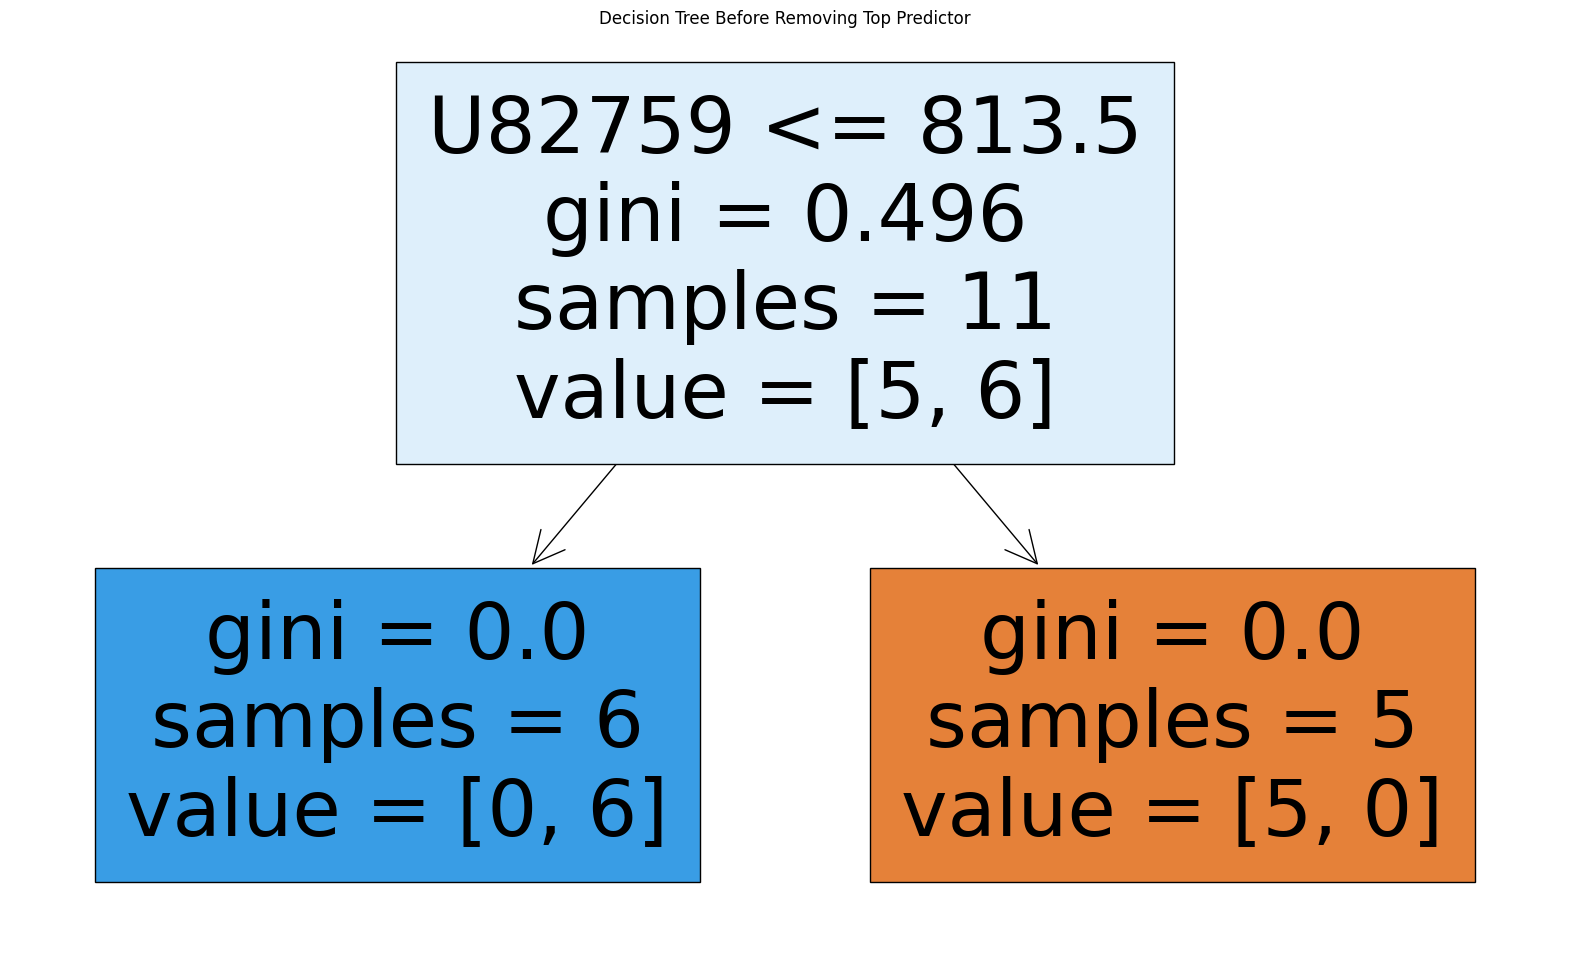

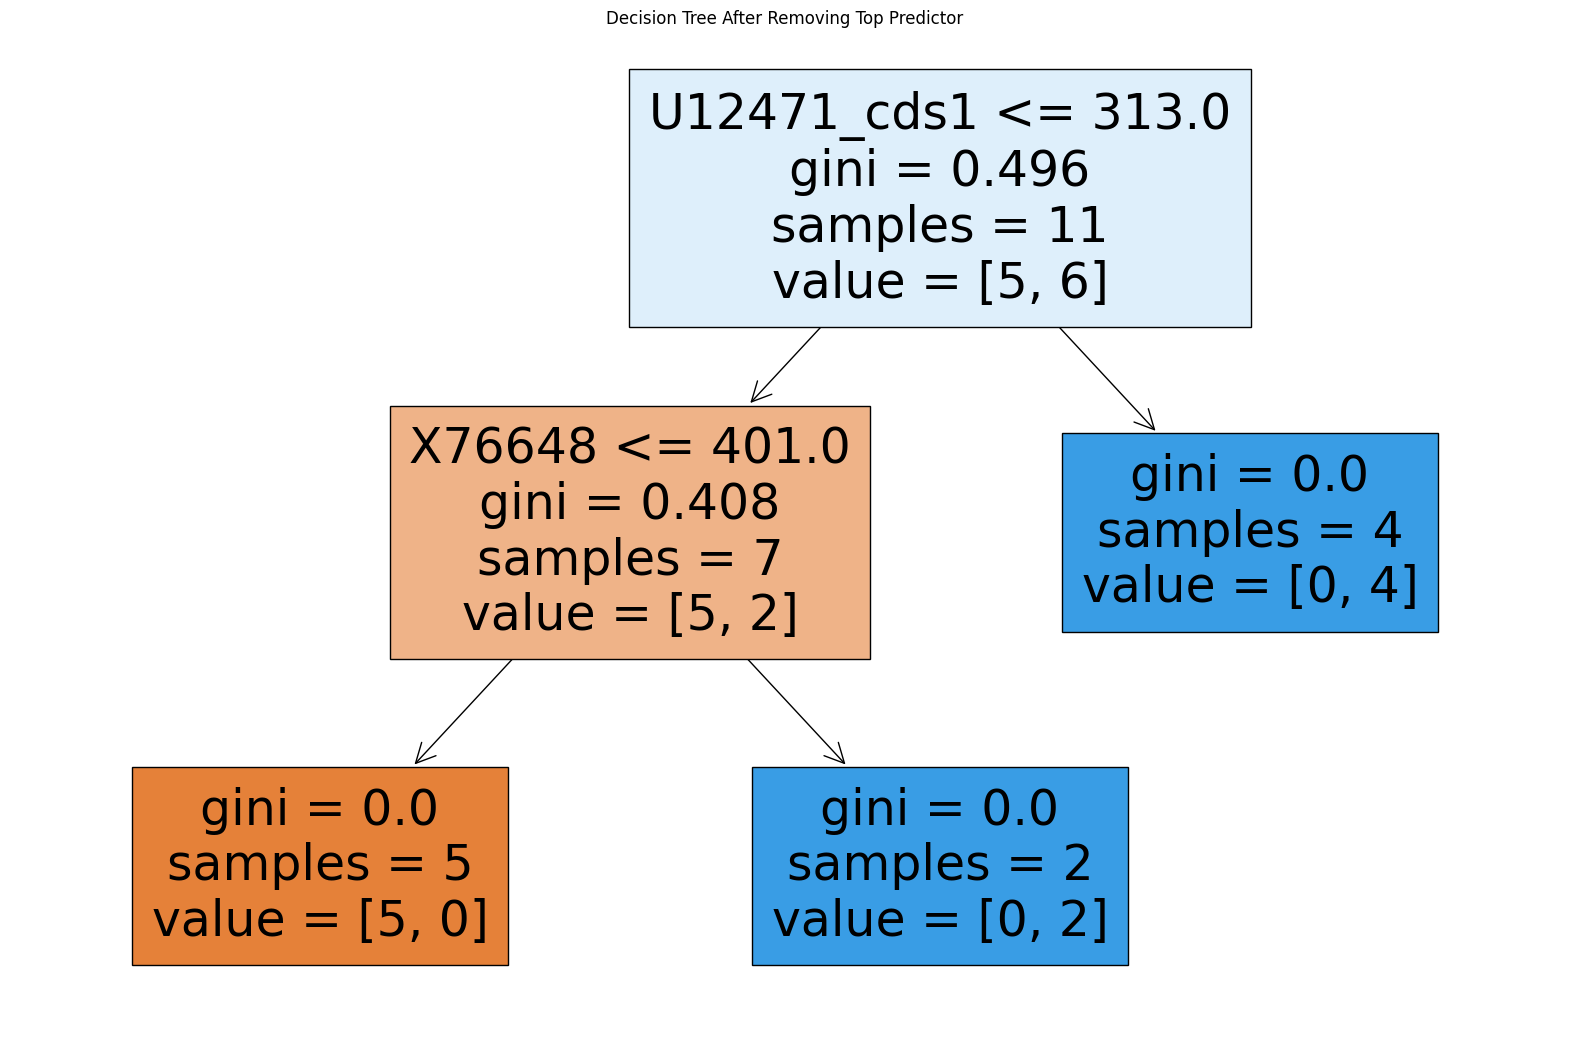

Accuracy of the second decision tree after removing top predictor: 0.25


In [53]:
from sklearn.tree import  plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split the data into 75% training and 25% test
features_train, features_test, target_train, target_test = train_test_split(features_encoded, target, test_size=0.25, random_state=3)

# Initialize Decision Tree Classifier and fit the model on the training data
clf = DecisionTreeClassifier(random_state=3)
clf.fit(features_train, target_train)

# Report the accuracy on the test set
target_pred = clf.predict(features_test)
accuracy = accuracy_score(target_test, target_pred)
print("Accuracy before removing top predictor:", accuracy)

# Identify the most important feature in the first tree
importances = clf.feature_importances_
top_feature_index = np.argmax(importances)  
top_feature_name = features_encoded.columns[top_feature_index]
print("Top feature/predictor:", top_feature_name)

# Visualize the tree and confirmm the identification of the top feature
plt.figure(figsize=(20,12))
plot_tree(clf, feature_names=features_encoded.columns, filled=True)
plt.title("Decision Tree Before Removing Top Predictor")
plt.show()

# Remove the top predictor from the training and test data
features_train_removed = features_train.drop(columns=[top_feature_name])
features_test_removed = features_test.drop(columns=[top_feature_name])

# Refit the decision tree without the top feature
clf_removed = DecisionTreeClassifier(random_state=3)
clf_removed.fit(features_train_removed, target_train)

# Visualize the second tree
plt.figure(figsize=(20,13))
plot_tree(clf_removed, feature_names=features_train_removed.columns, filled=True)
plt.title("Decision Tree After Removing Top Predictor")
plt.show()

# Report the accuracy of the new tree after removing the top feature
target_pred_removed = clf_removed.predict(features_test_removed)
accuracy_removed = accuracy_score(target_test, target_pred_removed)
print("Accuracy of the second decision tree after removing top predictor:", accuracy_removed)

Before removing the top predictor, the decision tree model achieved an accuracy of 0.75 (75%). The most important feature in this tree was 'U82759' with a splitting threshold of 813.5. This tree’s visualization shows that this initial split perfectly separated the samples into two pure leaf nodes, each with a Gini index of 0 (indicating perfect classification). One branch contained 6 samples (all classified as class 1), and the other contained 5 samples (all classified as class 0).

After removing 'U82759', the second decision tree model selected 'U12471_cds1' as the new top predictor with a threshold of 313.0. This change resulted in a significant drop in accuracy, down to 0.25 (25%). This new tree struggled to effectively separate the data, resulting in impure splits with a higher Gini index compared to the original tree. This decrease in classification performance shows that the tree was less capable of making accurate predictions without 'U82759'.

Furthermore, the drastic drop in accuracy emphasizes the critical importance of 'U82759' as a highly informative feature. Its removal forced the model to rely on less informative features such as 'U12471_cds1', which were not as capable of creating clear decision boundaries. As a result, the overall structure of the second tree became weaker and led to more misclassifications as reflected by the higher Gini index.

Overall, the removal of 'U82759' caused a substantial reduction in the decision tree's ability to classify data correctly. Without this key feature, the model's predictive power degraded, resulting in a less effective tree structure that struggled to identify clear decision boundaries between classes. The comparison between both trees demonstrates that the feature 'U82759' played a crucial role in guiding the model's decision-making process, making 'U82759' an essential predictor for maintaining a higher performing predictive model.

## Q1.6 (2 marks)

Which tree do you think is more generalizable? You may want to more thoroughly compare the trees (readability, sensitivity/specificity, structure simplicity, etc.).

## Q1.6 Answer

The first decision tree (which uses 'U82759' as the top predictor) is more generalizable compared to the second tree, which relies on 'U12471_cds1' after removing the top predictor. 

In terms of readability, the first tree is more straightforward to interpret due to its simplicity. It has fewer splits with 'U82759' creating a clean separation between the classes at its root node. The tree also achieves pure leaf nodes (i.e., a Gini index of 0) after just one split, making the decision-making process easy to follow. In contrast, the second tree requires additional splits to classify the data, making it harder and more complex to interpret.

Regarding sensitivity and specificity, the first tree demonstrates high performance, with perfect classification at its leaf nodes. Each branch effectively separates the positive and negative classes, minimizing both false positives and false negatives. On the other hand, the second tree shows a signifficant drop in accuracy from 75% to 25% after 'U82759' is removed. This decrease indicates a loss in both sensitivity and specificity, as the tree struggles to find strong decision boundaries without the top predictor 'U82759'.

In consideration of structure simplicity, the first tree’s concise structure (with a single decision split) lead to perfect classification and can be considered an efficient model that avoids unnecessary complexity. Simpler decision tree models are generally better at generalizing as they are less likely to overfit to the training data. Additionally, the first tree's splits are also more stable, making it more robust when applied to new datasets. After the removal of 'U82759', the second tree’s structure becomes more complex by relying on 'U12471_cds1' and other features to create multiple splits. This increased complexity can indicate overfitting, where the model becomes overly tuned to the training data and thus, fails to generalize to new unseen patient data.

Overall, the first tree with 'U82759' as the top predictor is more generalizable due to its clear decision boundaries, high accuracy, and simpler structure. The second tree, without 'U82759', becomes more complex, struggles to create effective splits, and thus exhibits a reduced ability to generalize to new patient data. The significant accuracy drop (i.e., from 75% to 25%) in the second tree emphasizes the importance of 'U82759' in maintaining the model’s predictive strength.

# Q2: Decision Boundaries (4 marks)

In this question, we will visualize the decision boundaries formed by three simple classifiers on an example dataset.

## Q2.1 (4 marks)

We have provided code below to produce the data and to create the decision boundary. You will need to run this code using the following models:
1. "ZeroR" classifier - `sklearn.dummy.DummyClassifier` using the `"most_frequent"` strategy.
2. KNN classifier - `sklearn.neighbors.KNeighborsClassifier`
3. Decision tree classifier - `sklearn.tree.DecisionTreeClassifier`

You will need to modify the code to output the accuracy for each of the models. Using both this information and the visualized decision boundaries, explain the performance of these algorithms. A brief explanation of the classifiers will be required for this.

**Hints:**
* Although not necessary, the use of further visualizations, performance measures, or even datasets may help to support your discussion
* Use the decision boundaries as a reference point to explain the **differences** between the classifiers.

In [41]:
'''
The code below provides you with the functions to get the data,
and plot the decision boundary.

The resulting graphs have not been properly formatted, however,
so you will need to add that. You will also need to modify the 
code to output the accuracy.
'''

import numpy as np    
from sklearn.datasets import make_classification

def get_data():
    # Create data
    data, labels = make_classification(
        n_features=2, n_redundant=0, n_informative=2,
        random_state=1, n_clusters_per_class=1
    )
    # Set the RNG
    rng = np.random.RandomState(42)
    # Add some noise
    data += 2 * rng.uniform(size=data.shape)
    return data, labels

def plot_boundary(X, ax, clf):
    # Plotting decision regions
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.1),
        np.arange(y_min, y_max, 0.1)
    )
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    return ax
    
def boundary_full(data, labels, model, name, **kwargs):
    # Create estimator/model/classifier
    clf = model(**kwargs)
    # Fit the classifier
    clf.fit(data, labels)

    # Create axis
    fig, ax = plt.subplots()
    # Call the provided function
    ax = plot_boundary(data, ax, clf)
    # Now add the data (using scatter)
    # Ensure to colour the points according to the prediction
    ax.scatter(data[:,0], data[:,1], c=labels, s=20, edgecolor="k")
    # Format the graph...
    ax.set_title(f"Decision Boundary for {name}")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    plt.show()

    # Output accuracy
    predictions = clf.predict(data)
    accuracy = accuracy_score(labels, predictions)
    print(f"Accuracy for {name}: {accuracy:.4f}")


## Q2.1 Answer

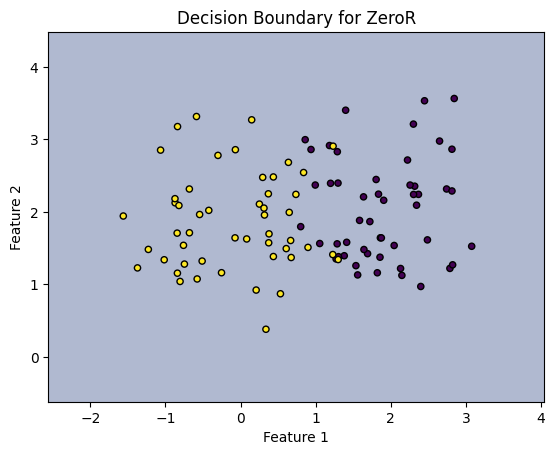

Accuracy for ZeroR: 0.5000


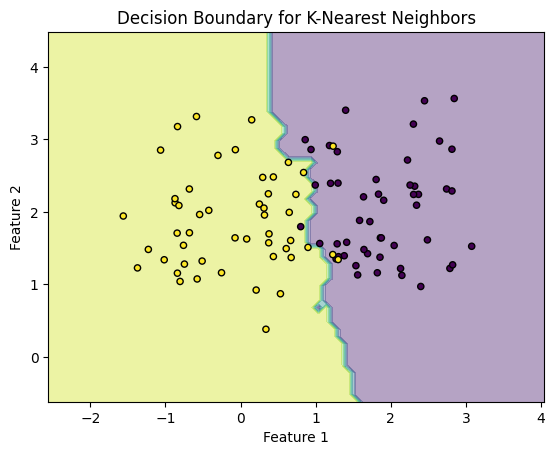

Accuracy for K-Nearest Neighbors: 0.9500


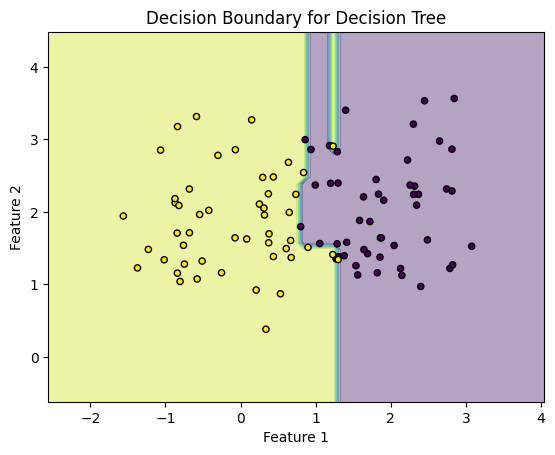

Accuracy for Decision Tree: 1.0000


In [42]:
# Load the data
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier


data, labels = get_data()

# ZeroR classifier
boundary_full(data, labels, DummyClassifier, "ZeroR", strategy="most_frequent")

# KNN classifier
boundary_full(data, labels, KNeighborsClassifier, "K-Nearest Neighbors", n_neighbors=3)

# Decision Tree classifier
boundary_full(data, labels, DecisionTreeClassifier, "Decision Tree", random_state=42)

The ZeroR classifier is considered as a baseline model that assigns all instances to the most frequent class without considering any of the given features. Since ZeroR predicts the most frequent class, it does not use the feature space for making decisions, leading to a flat decision boundary with no meaningful separation between the two classes. The accuracy of ZeroR is 0.50 (or 50%), which is expected since it does not differentiate between the classes based on their respective feature values. The ZeroR classifier merely serves as a baseline to compare against more sophisticated algorithms and illustrates how a model ignoring feature information can perform. Its low accuracy and trivial decision boundary indicate that it is not a good fit for most classification tasks where features matter.

The K-Nearest Neighbors (KNN) classifier uses the labels of the nearest neighbors to classify a new data point. In this case, KNN (with k=5) performed much better with an accuracy of 0.95 (or 95%). The decision boundary produced by KNN is smoother and adjusts to the complexity of the data by curving around the space of the feature. This demonstrates how KNN is capable of capturing the local structure of the data and make finer distinctions between the classes. Furthermore, the value of k affects the smoothness of the boundary; a smaller value of k might result in more complex boundaries, wheras a larger value of k produces a smoother and more generalized boundary. Additionally, the decision boundary shows some irregularities as KNN’s performance can be sensitive to both nearby data points and the value of 𝑘. In this question, KNN was highly effective but can fluctuate in performance depending on both the structure and noise level of the dataset.

The Decision Tree classifier is a non-linear model that creates splits in the data based on feature thresholds. The decision tree performed perfectly in this case with an accuracy of 1.00 (or 100%). Its decision boundary is more segmented and rigid and reflects how decision trees divide the feature space using threshold-based rules/conditions. While this leads to perfect classification on the dataset, the sharp box-like boundaries show that decision trees can be prone to overfitting, especially when the model achieves perfect accuracy on the training dataset. Furthermore, the segmented decision boundary suggests that the decision tree has overfit the training data by creating many precise splits, which may hinder the classifier's ability to generalize to unseen data.

# Question 3: Training Time Comparison (4 marks)

## Q3.1 (2 marks)

Plot the training time for both `DecisionTreeClassifier` and `GaussianNB` against the data size. A function to generate the data is provided to you, which takes the size as its only argument.

Explain what you observe and your understanding in terms of training time and data size (include a graph). Consider algorithm implementation and potential stochasticity in running times.

In [43]:
# Use this function to measure the time
from time import time

# Use this function to generate the data
def create_data(size):
    # Create data
    data, labels = make_classification(
        n_samples=size,
        n_features=2, n_redundant=0, n_informative=2,
        random_state=4, n_clusters_per_class=1
    )
    return data, labels

## Q3.1 Answer

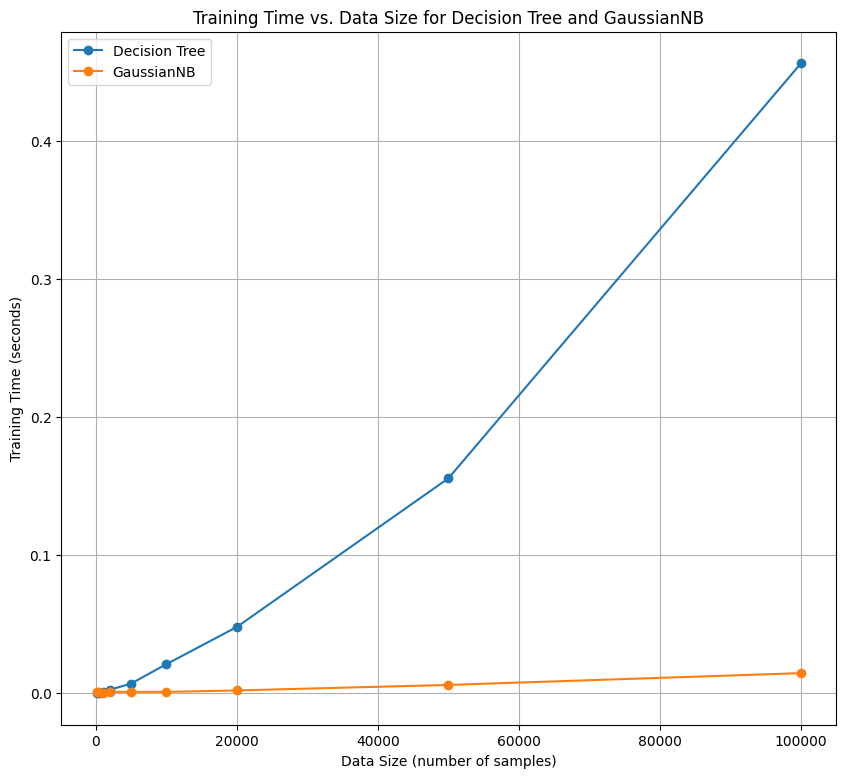

Decision Tree training times: [0.0, 0.0, 0.0010013580322265625, 0.0025167465209960938, 0.006993293762207031, 0.02099609375, 0.04796791076660156, 0.15554451942443848, 0.45595216751098633]
GaussianNB training times: [0.001001596450805664, 0.0010027885437011719, 0.0, 0.0010042190551757812, 0.0010001659393310547, 0.0009984970092773438, 0.0020003318786621094, 0.005997896194458008, 0.014535665512084961]


In [44]:
from sklearn.naive_bayes import GaussianNB

# Define data sizes to test
data_sizes = [100, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]

# Initialize lists to store training times
decision_tree_times = []
gaussian_nb_times = []

# Loop over different data sizes
for size in data_sizes:
    x, y = create_data(size)
    
    # Measure training time for DecisionTreeClassifier
    clf_tree = DecisionTreeClassifier()
    start_time = time()
    clf_tree.fit(x, y)
    # Store the time
    decision_tree_times.append(time() - start_time)  
    
    # Measure training time for GaussianNB
    clf_nb = GaussianNB()
    start_time = time()
    clf_nb.fit(x, y)
    # Store elapsed time
    gaussian_nb_times.append(time() - start_time)  

# Plotting the results
plt.figure(figsize=(10, 9))
plt.plot(data_sizes, decision_tree_times, label='Decision Tree', marker='o')
plt.plot(data_sizes, gaussian_nb_times, label='GaussianNB', marker='o')
plt.xlabel('Data Size (number of samples)')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs. Data Size for Decision Tree and GaussianNB')
plt.legend()
plt.grid(True)
plt.show()

# Display the training times for each classifier
print("Decision Tree training times:", decision_tree_times)
print("GaussianNB training times:", gaussian_nb_times)

As the number of instances increases, the training time for the Decision Tree classifier grows significantly more compared to GaussianNB, as depicted in the given graph. This difference emerges from the inherent time complexity of both algorithms.

Decision Tree classifiers have a time complexity of approximately O(nlogn), where n is the number of data points. This means that as the dataset grows larger, the process of recursively splitting the data and constructing the tree becomes increasingly time-consuming. The decision tree needs to evaluate multiple splits for each feature at each node, which results in a steep increase in training time, as observed in the graph when the dataset size surpasses 20,000 samples.

In contrast, GaussianNB has a simpler structure with a linear time complexity of O(n), meaning that its training time increases proportionally with the number of data points. Since Naive Bayes uses simple statistical measures (e.g., mean and variance) to calculate probabilities for each feature, it requires far less computations compared to decision trees. This simplicity allows GaussianNB to maintain a consistently low training time even as the dataset size increases. This behavior is reflected in the graph as a nearly flat line that shows little to no increase in training time across different dataset sizes.

Furthermore, the graph further illustrates that while the Decision Tree’s training time starts similarly to GaussianNB with small datasets, it eventually increases dramatically, reaching nearly 0.5 seconds with 100,000 samples. This observation further supports the theoretical understanding of their time complexities. Although slight variations in running times might occur due to system factors or variations in data, the overall trend remains consistent.

Therefore, for a very large number of instances, GaussianNB would be more suitable due to its efficient scaling with data size. It can handle increments dataset size with only a modest increase in training time, making it a more ideal choice for large datasets where speed is crucial. On the other hand, although the Decision Tree classifier can be potentially more accurate for complex patterns, it may become impractically slow as the dataset grows, making it less appropriate for large-scale datasets.

## Q3.2 (2 marks)
What do you think would happen if we continue increasing the number of instances? Which of the algorithms would be more suitable for a very large number of instances and why? Consider the algorithms’ complexity and how they scale.

## Q3.2 Answer

As the number of instances increases, we should expect the training time for the Decision Tree classifier to grow more rapidly compared to GaussianNB. This difference emerges from the inherent time complexity of both algorithms.

Decision Tree classifiers have a time complexity of approximately O(nlogn), where n is the number of data points. As the dataset grows larger, the process of recursively splitting the data and constructing the tree becomes increasingly time-consuming. Specifically, the decision tree must evaluate multiple splits for each feature at each node, leading to a substantial increase in training time as the number of instances increase, especially for very large datasets.

In contrast, GaussianNB has a much simpler structure with a linear time complexity of O(n), meaning that its training time will proportionally increase with the number of data points. Because Naive Bayes relies on simple statistical measures (e.g., mean and variance) to calculate probabilities for each feature, it requires far less computations compared to decision trees. This makes GaussianNB much more scalable and efficient, even as the size of the dataset becomes very large.

Therefore, for a very large number of instances, GaussianNB would be more suitable due to its efficient scaling with data size. It can manage increases in dataset size (or number of instances) with only a modest increase in training time, making it more ideal for large-scale datasets. Contrarily, although the Decision Tree classifier might offer more accurate results for complex patterns, its time complexity can render it impractically slow as the size of the dataset (or number of instances) grows signifficantly, making it less appropriate for large-scale problems involving a very large number of datasets (or number instances).

# Question 4: Memory Usage Comparison (3 marks)

# Q4.1 (3 marks)

Plot the memory usage of the `DecisionTree` model against the data size. Explain the memory usage of the model (including a graph in your answer).

You should use the same `create_data()` function provided for Q3, and ensure that you have downloaded `memory.py` from Blackboard in order to load the `measure_memory()` function.

In [45]:
from memory import measure_memory

## Q4.1 Answer

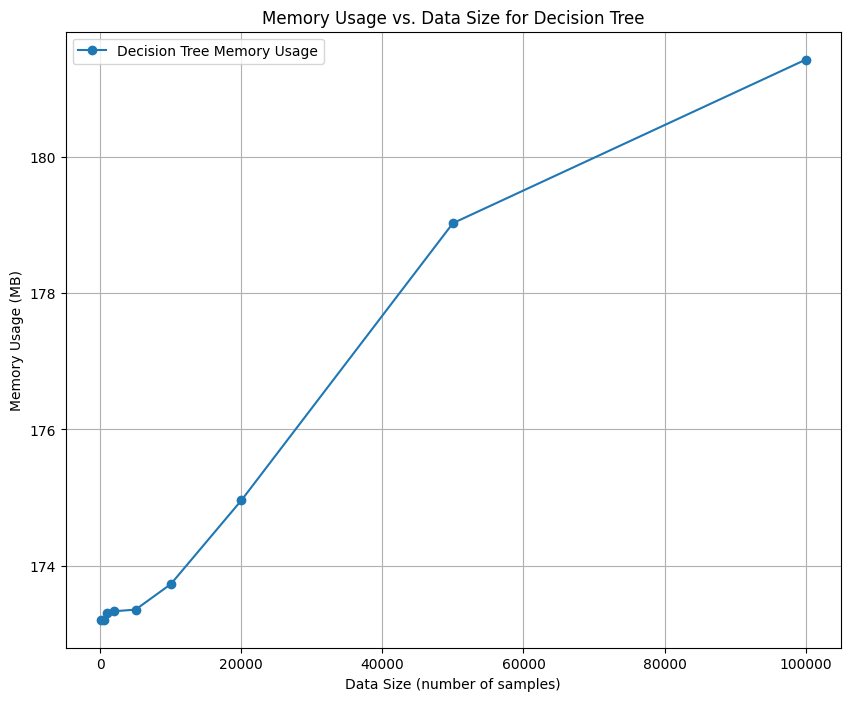

In [47]:
# List to store the memory usage results
memory_usages = []

# Loop through different dataset sizes
for size in data_sizes:
    # Generate the data
    data, labels = create_data(size)
    
    # Initialize the Decision Tree model
    clf = DecisionTreeClassifier()
    
    # Measure the memory used when fitting the Decision Tree
    memory_used = measure_memory(data, labels, clf)
    
    # Store the memory usage result
    memory_usages.append(memory_used)

# Plot the memory usage against data size
plt.figure(figsize=(10, 8))
plt.plot(data_sizes, memory_usages, marker='o', label="Decision Tree Memory Usage")
plt.title("Memory Usage vs. Data Size for Decision Tree")
plt.xlabel("Data Size (number of samples)")
plt.ylabel("Memory Usage (MB)")
plt.legend()
plt.grid(True)
plt.show()

The graph indicates that memory usage steadily rises from approximately 173MB for a small dataset to nearly 182MB for 100,000 samples. This upward trend reflects the increasing computational requirements (i.e., memory usage) as the decision tree grows in response to larger datasets.

Decision trees operate by recursively splitting the data into subsets based on feature values, leading to the creation of additional nodes and deeper tree structures. Each node requires memory for storing information about the split condition, data pointers, and references to child nodes. As the size of the dataset increases, the number of nodes and overall depth of the tree also increase, leading to increased memory usage.

The nearly linear trend in the graph indicates that the growth in memory usage is proportional to the size of the dataset. This alligns with the space complexity of decision trees, which is approximately O(n), where n is the number of datapoints/instances. As the size of the dataset increases, the memory requirements increase accordingly, but not exponentially. This suggests that the model handles scaling in a predictable manner.

Although this growth can be manageable for moderate data sizes, it becomes important to consider when dealing with larger datasets, especially in memory-constrained environments. The gradual increase in memory usage could introduce bottlenecks if the model is being applied to datasets exceeding the system's memory capacity. To address this concern, strategies like pruning or model simplification can be applied in efforts for reducing memory consumption

Overall, it can be suggested that the decision tree classifier's memory usage scales in a linear-like manner with data size, resulting in greater memory demands as the dataset grows. This emphasizes the need to balance dataset size, model complexity, and available memory when scaling decision tree-based models for large-scale data.